In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(12, 10)})

In [2]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Male = pd.get_dummies(data['Sex'], drop_first=True)
data = pd.concat([data,Male],axis=1)

**Types of Features :** 
- **Categorical**  - Sex, and Embarked.
- **Continuous **  - Age, Fare
- **Discrete**     - SibSp, Parch.
- **Alphanumeric** - Cabin

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
male             0
dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

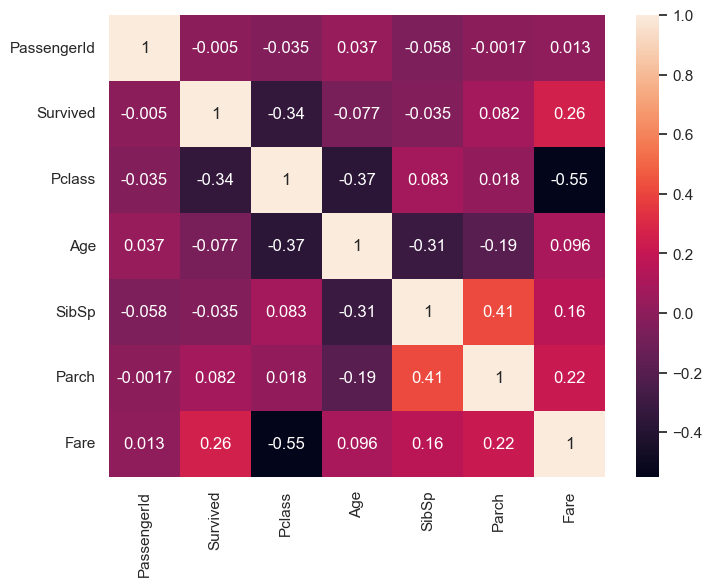

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True)

## <font color = "green">sibsp - Number of siblings / spouses aboard the Titanic </font>

<Axes: xlabel='Age', ylabel='Survived'>

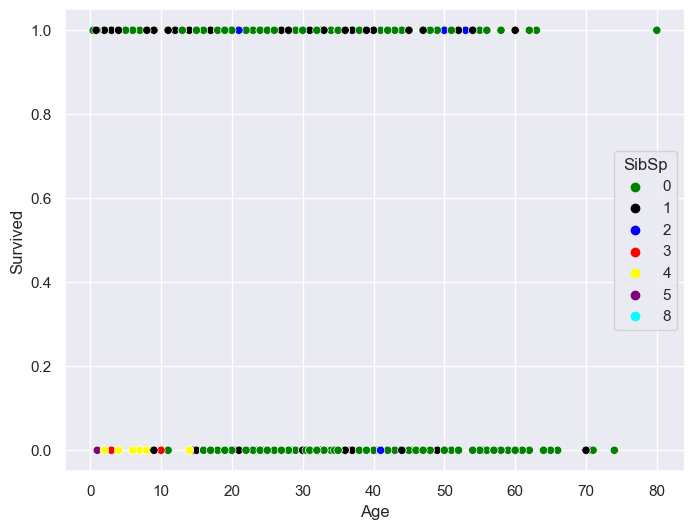

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age",y="Survived", data=data, hue="SibSp",palette=['green','black','blue','red','yellow','purple','cyan'])

In [29]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

       PassengerId  Survived    Pclass        Age     Parch       Fare
SibSp                                                                 
0       455.370066  0.345395  2.351974  31.397558  0.185855  25.692028
1       439.727273  0.535885  2.057416  30.089727  0.655502  44.147370
2       412.428571  0.464286  2.357143  22.620000  0.642857  51.753718
3       321.562500  0.250000  2.562500  13.916667  1.312500  68.908862
4       381.611111  0.166667  3.000000   7.055556  1.500000  31.855556
5       336.800000  0.000000  3.000000  10.200000  2.000000  46.900000
8       481.714286  0.000000  3.000000        NaN  2.000000  69.550000


<Axes: xlabel='SibSp'>

<Figure size 600x600 with 0 Axes>

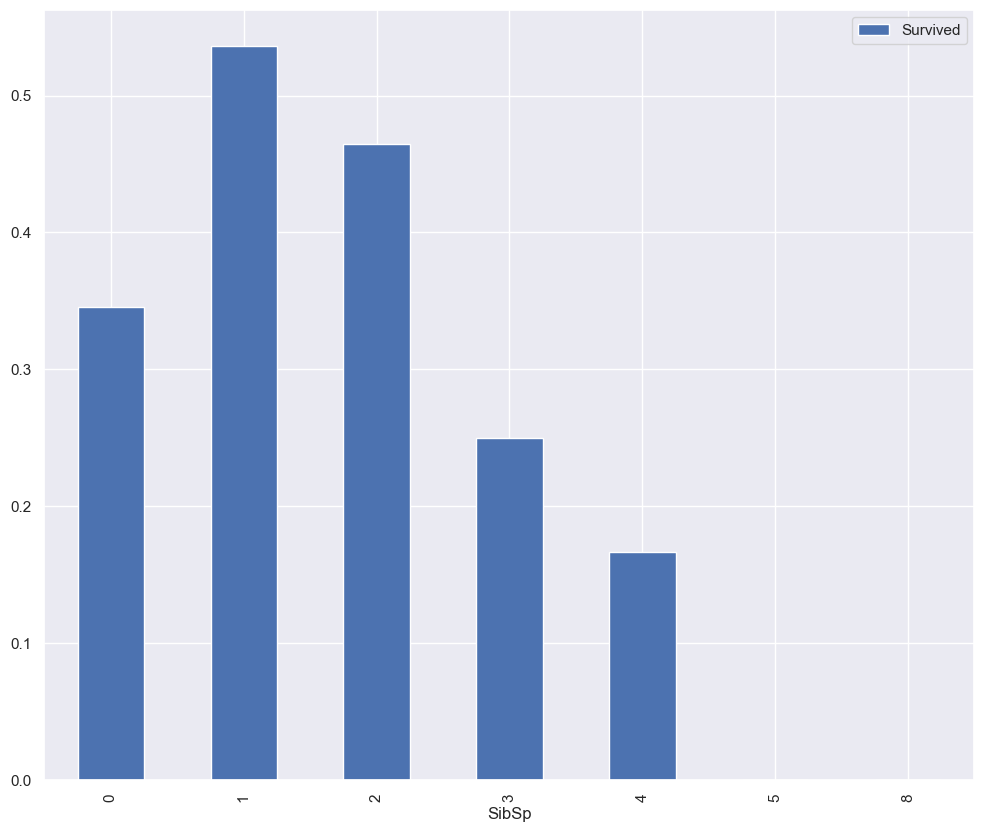

In [53]:
# panda methord
print(data.groupby('SibSp').mean())
plt.figure(figsize=(6, 6))
data.groupby('SibSp').mean().plot(kind='bar',y='Survived')

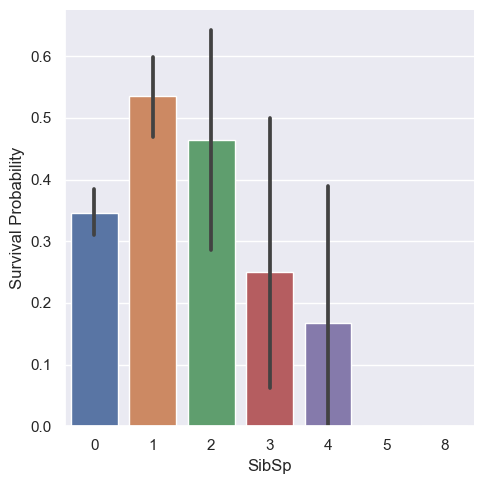

In [62]:
# Seaborn methord
sns.catplot(x='SibSp',y='Survived', data=data, kind='bar').set_ylabels('Survival Probability')

- It seems that passengers having a lot of siblings/spouses have less chance to survive.
- Single passengers (0 SibSP) or with two other persons (SibSP 1 or 2) have more chance to survive.

## <font color = "green"> Age </font>

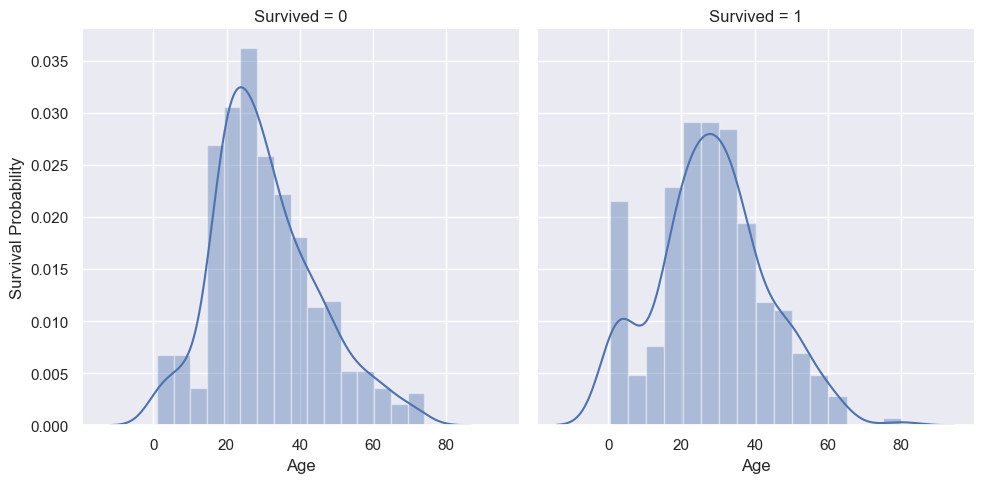

In [149]:
sns.FacetGrid(data, col='Survived', height=5).map(sns.distplot, "Age").set_ylabels("Survival Probability")

# Gender

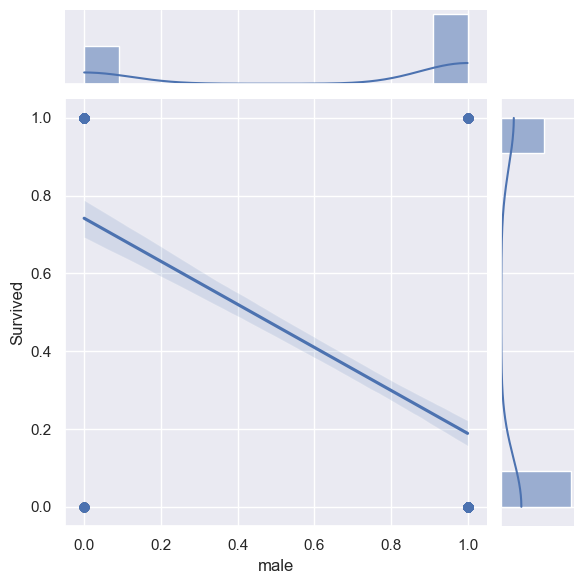

In [82]:
sns.jointplot(x='male',y='Survived',data=data,kind='reg')  #kind = hex

<Axes: xlabel='Sex'>

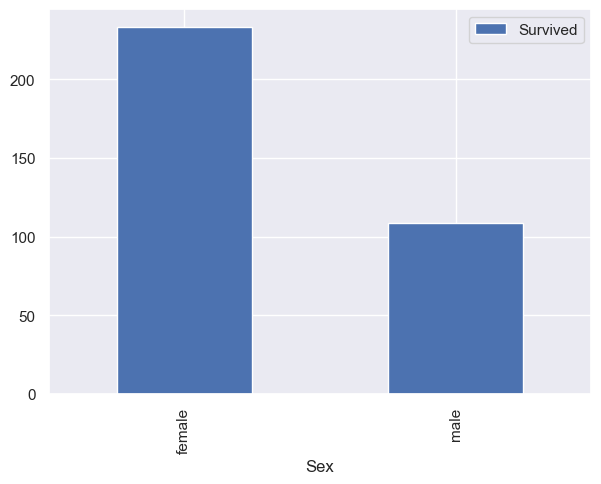

In [106]:
plt.figure(figsize=(8, 6))
data.groupby('Sex').sum().plot(kind='bar',y="Survived",figsize=(7, 5))

Text(0, 0.5, 'Survival Probability')

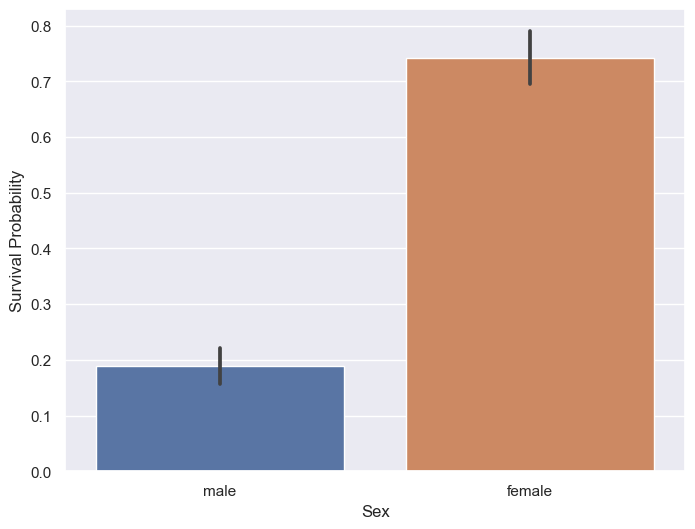

In [131]:
# data.groupby('Sex').mean().plot(kind='bar',y="Survived",figsize=(7, 5))
plt.figure(figsize=(8, 6))
sns.barplot(x = "Sex",y = "Survived", data = data).set_ylabel("Survival Probability")

In [127]:
print("\nTotal Male Female")
print(data["Sex"].value_counts())
df = data[data['Survived']==1]
print("\nSurvived Male Female")
df["Sex"].value_counts()


Total Male Female
male      577
female    314
Name: Sex, dtype: int64

Survived Male Female


female    233
male      109
Name: Sex, dtype: int64

In [136]:
data.groupby('Sex').mean()["Survived"]

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

It is clearly obvious that Male have less chance to survive than Female. So Sex, might play an important role in the prediction of the survival.
For those who have seen the Titanic movie (1997), I am sure, we all remember this sentence during the evacuation  - **Women and children first**

# <font color = "green">PClass</font>

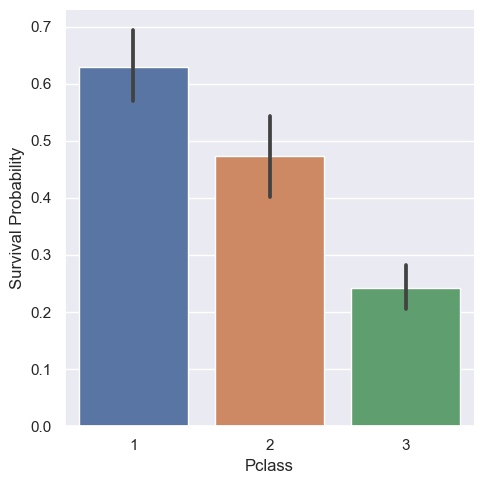

In [154]:
sns.catplot(x="Pclass",y="Survived", data=data, kind="bar").set_ylabels("Survival Probability")

### PClass and Sex

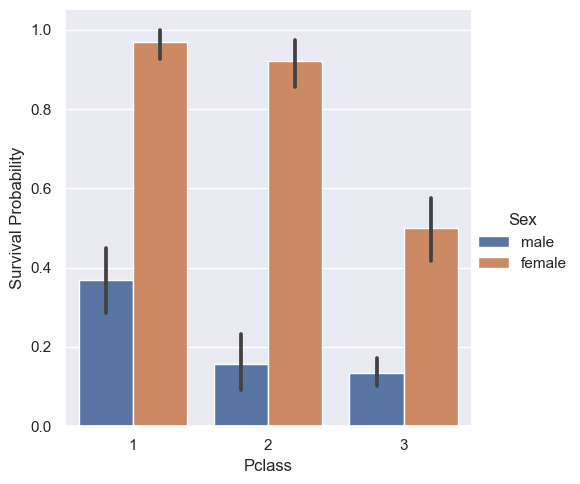

In [153]:
sns.catplot(x="Pclass",y="Survived", data=data, kind="bar",hue="Sex").set_ylabels("Survival Probability")

# Emabarked 
 C = Cherbourg, Q = Queenstown, S = Southampton

In [156]:
data["Embarked"].isnull().sum()

2

In [159]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [160]:
data["Embarked"] = data["Embarked"].fillna("S")

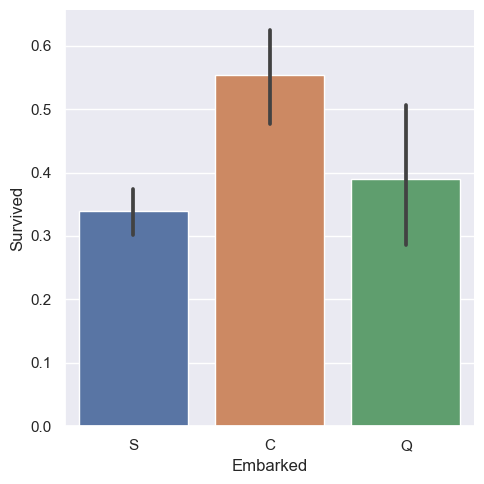

In [161]:
sns.catplot(x="Embarked", y="Survived", data=data, kind="bar")

H

# IMP

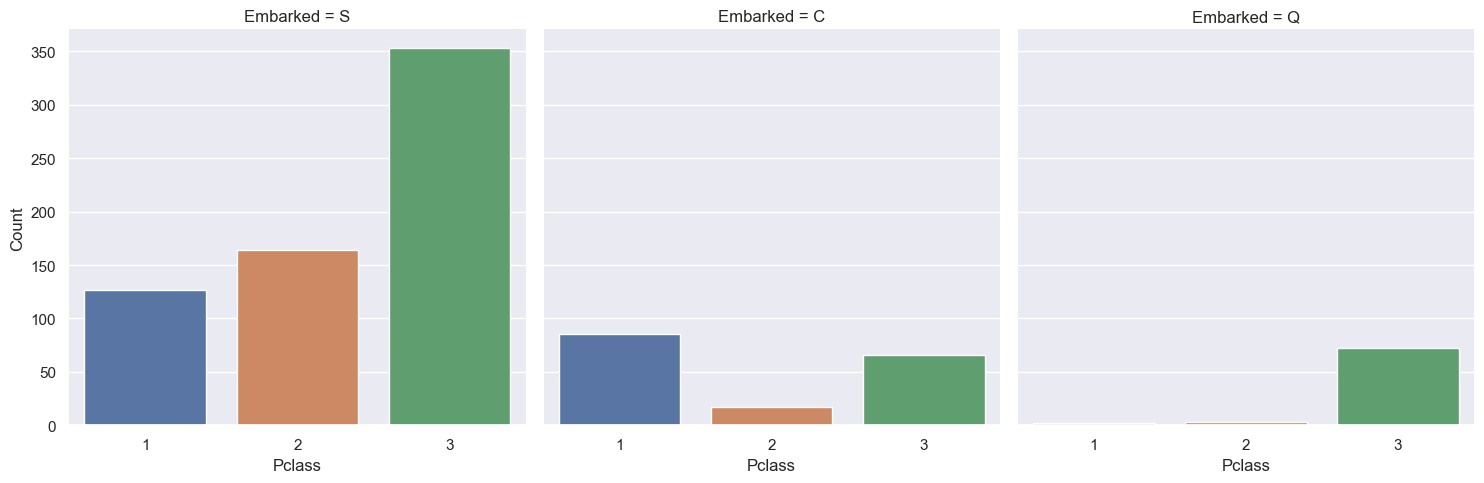

In [13]:
g = sns.catplot(x="Pclass", col="Embarked", data=data, kind="count")
g.despine(left=True)
g = g.set_ylabels("Count")

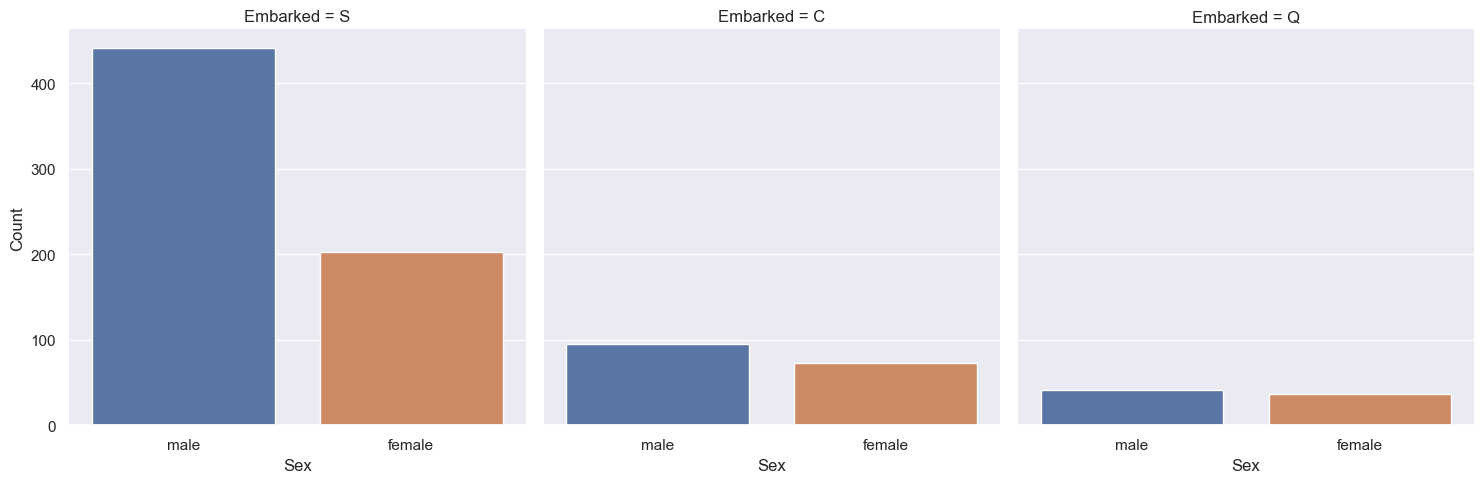

In [14]:
g = sns.catplot(x="Sex", col="Embarked", data=data, kind="count")
g.despine(left=True)
g = g.set_ylabels("Count")

Cherbourg passengers are mostly in first class which have the highest survival rate.
<br/>
Southampton (S) and Queenstown (Q) passangers are mostly in third class.

# <font color = "green">Preparing data</font>

In [17]:
mean = data['Age'].mean()
std = data["Age"].std()

is_null = data['Age'].isnull().sum()

In [18]:
print(mean, std, is_null)

29.69911764705882 14.526497332334044 177


In [21]:
rand_age = np.random.randint(mean-std, mean+std, size=is_null)

In [23]:
type(rand_age)

numpy.ndarray

In [29]:
a=data["Age"].copy()
a[np.isnan(a)] = rand_age  #a[np.isnan(a)] will return true to those indexes which have null values
data["Age"] = a

In [26]:
a.isnull().sum()

0

In [28]:
data["Embarked"] = data["Embarked"].fillna("S")

In [31]:
col_to_drop = ["PassengerId", "Cabin","Ticket","Name"]
data.drop(col_to_drop, axis=1, inplace=True)

In [32]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [33]:
gender = {"male":0, "female": 1}
data['Sex'] = data['Sex'].map(gender)

In [34]:
ports = {"S": 0, "C": 1, "Q":2}
data["Embarked"] = data["Embarked"].map(ports)

In [35]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,0
2,1,3,1,26.0,0,0,7.9250,0,0
3,1,1,1,35.0,1,0,53.1000,0,0
4,0,3,0,35.0,0,0,8.0500,0,1


# Splitting the data

In [36]:
x = data.drop(data.columns[0], axis=1)
y=data['Survived']

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=0)

# Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

# Classification

In [51]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [52]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [53]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [54]:
# finding accuracy
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [55]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  80.22
Support Vector      :  82.09
Decision Tree       :  78.36
K-NN Classifier     :  79.48
Random Forest       :  82.84
